## **Assignment 1: GDP, Life expectancy and more**
This report utilizes several data sets from [https://ourworldindata.org/](https://ourworldindata.org/).

Lukas Martinsson, Sidner Magnéli

Hours worked: Lukas Martinsson 14h, Sidner Magéli 14h 

In [272]:
## imports and configuration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   

## **Part 1**: Download some data related to GDP per capita and life expectancy.
___

In [273]:
## load data
dfraw = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")
dfraw.sample(5)

,Entity,Code,Year,Life expectancy,GDP per capita,145446-annotations,"Total population (Gapminder, HYDE & UN)",Continent
4248,Belgium,BEL,1802,NaN,NaN,NaN,3.166538e+06,NaN
2201,Asia,NaN,1975,57.904,NaN,NaN,2.401171e+09,NaN
35482,Peru,PER,1931,NaN,2397.0,NaN,5.624874e+06,NaN
9541,Cook Islands,COK,1971,59.876,NaN,NaN,2.100000e+04,NaN
4298,Belize,BLZ,1963,61.663,NaN,NaN,1.000000e+05,NaN


In [274]:
## Clean data
## Since data without GDP per capita and Life expectancy are irrelevant they are removed
df = (dfraw[dfraw['Year'] == 2018] # Only use data from 2018
  .dropna(subset = ['Life expectancy', 'GDP per capita']) # Remove row if either of these are NaN
)

del df['145446-annotations'], df['Continent'] # remove irrelevant columns

df.sample(10)

,Entity,Code,Year,Life expectancy,GDP per capita,"Total population (Gapminder, HYDE & UN)"
6335,Bulgaria,BGR,2018,74.928,18444.26,7052000.0
41127,Slovenia,SVN,2018,81.172,29244.92,2078000.0
25297,Lithuania,LTU,2018,75.737,27370.55,2801000.0
29982,Myanmar,MMR,2018,66.867,5838.22,53708000.0
10329,Cuba,CUB,2018,78.726,8325.63,11338000.0
23978,Latvia,LVA,2018,75.172,24312.68,1928000.0
9148,Comoros,COM,2018,64.118,1724.42,832000.0
7645,Cape Verde,CPV,2018,72.782,6831.22,544000.0
20345,Iraq,IRQ,2018,70.454,12835.81,38434000.0
45114,Tanzania,TZA,2018,65.015,2874.96,56313000.0


> ### **1.a)** Write a Python program that draws a scatter plot of **GDP per capita** vs **life expectancy**. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.

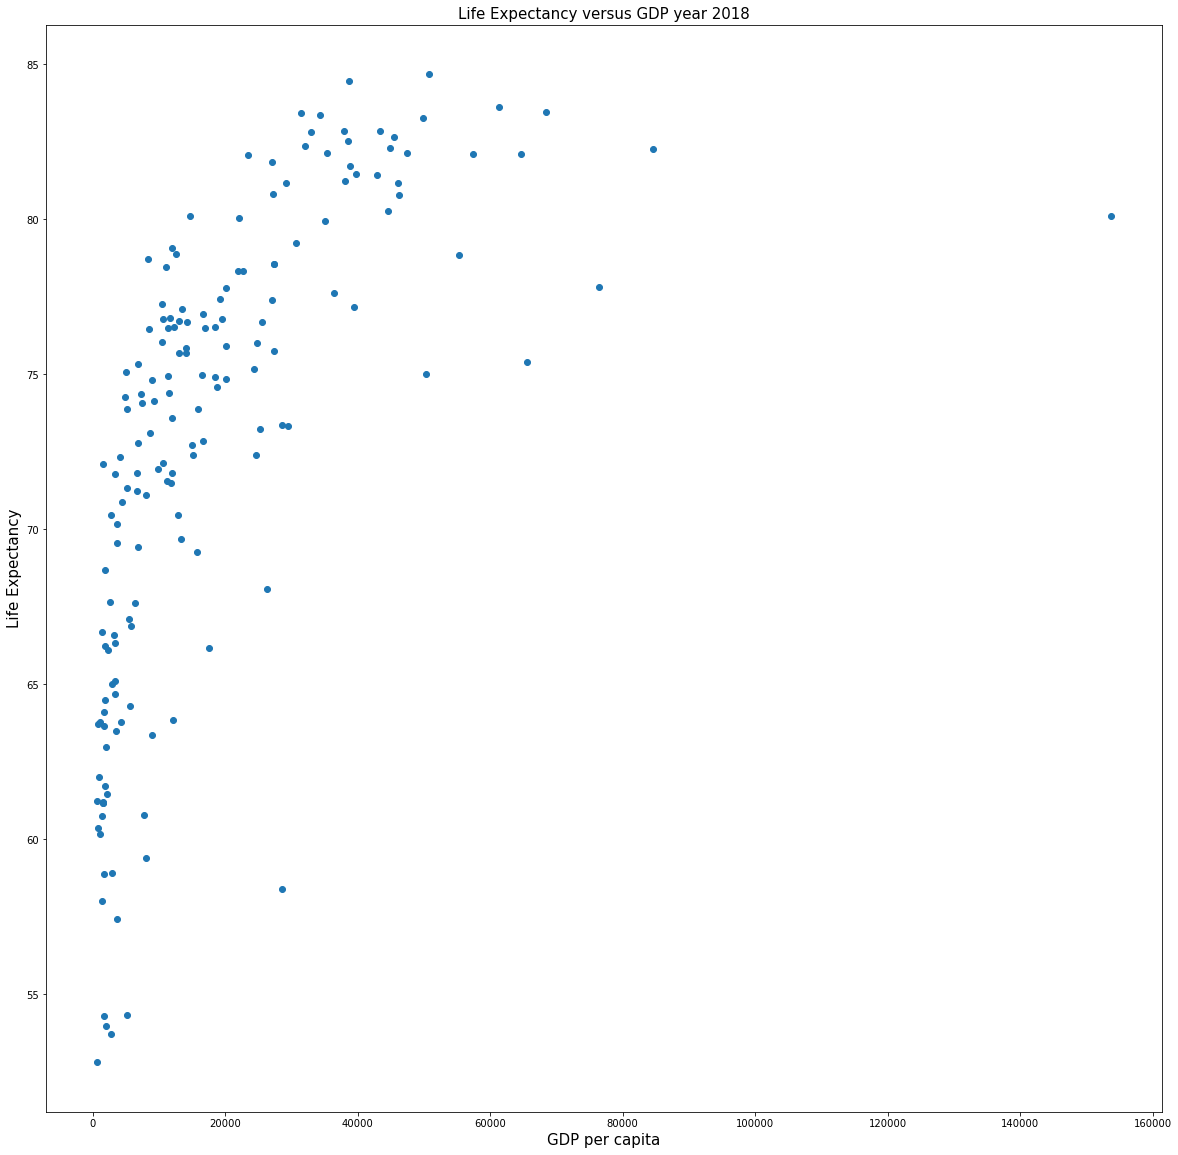

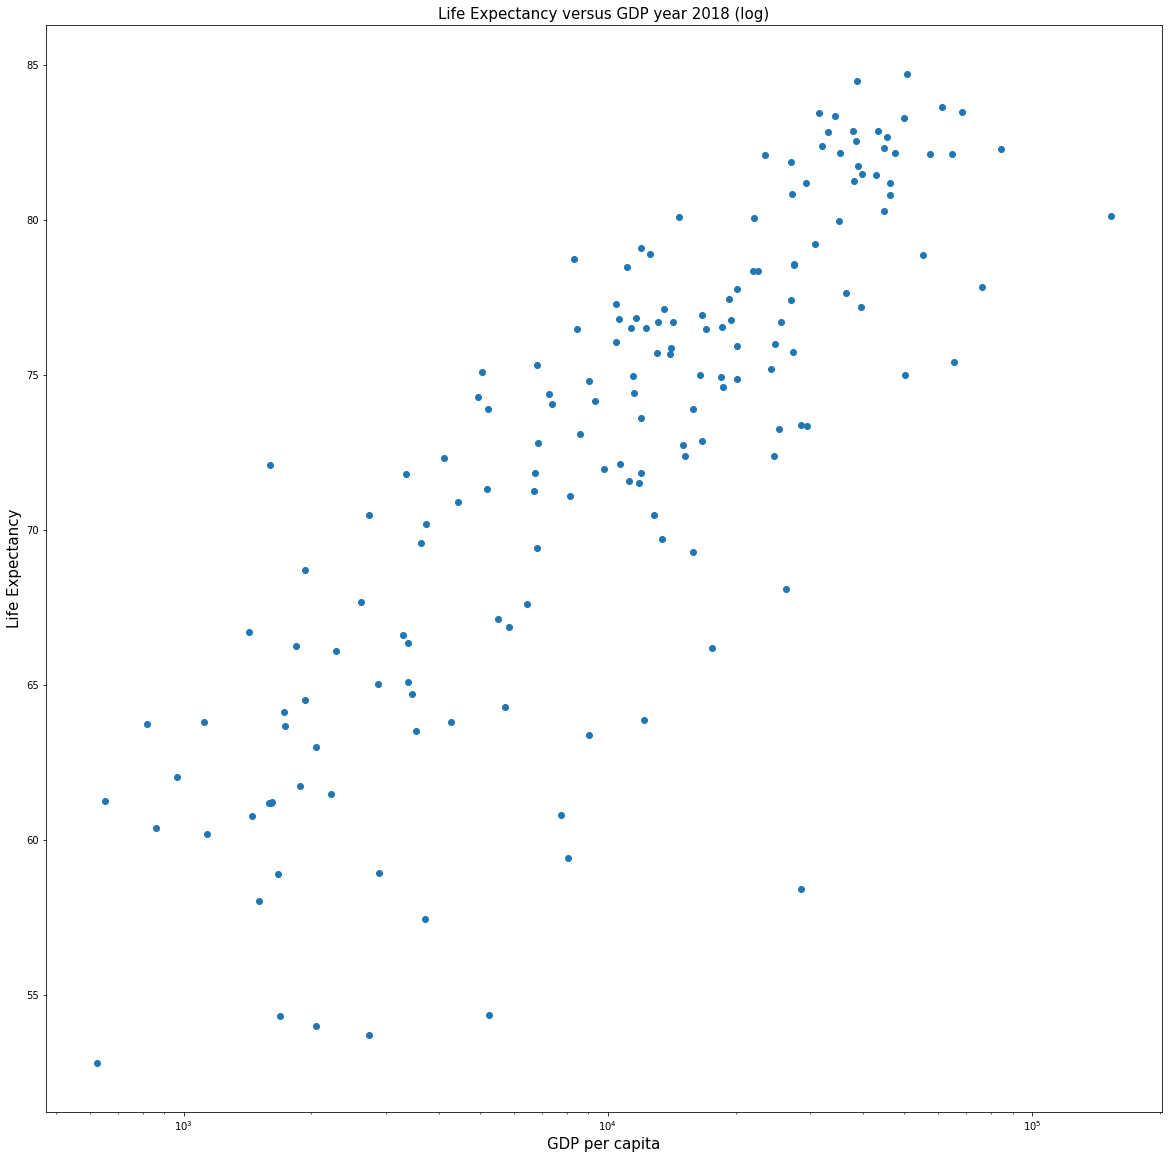

In [275]:
## Plot data
plt.scatter(df['GDP per capita'], df['Life expectancy'])

fs = 15
plt.title("Life Expectancy versus GDP year 2018", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Life Expectancy", fontsize = fs)

plt.show()

plt.title("Life Expectancy versus GDP year 2018 (log)", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Life Expectancy", fontsize = fs)

plt.scatter(df['GDP per capita'], df['Life expectancy'])
plt.xscale("log")

plt.show()

> ### **1.b)** Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained.
  As shown by first scatterplot above there exist some correlation between life expectancy and GDP per capita. This is further supported by the scatterplot using a log-scale which then shows a linear line

  Hence, it would be reasonable to conclude that there is some correlation between life expectancy and GDP per capita. However, whether it is causational or not is harder to determine. Firstly, you cannot say if a longer life expectancy leads to more accumulated knowledge which results in a higher GDP per capita or if a higher GDP per capita leads to better healthcare and nutrition which leads to higher life expectancy. Furthermore, there could be other factors at play that both GDP per capita and Life expectancy have a causational effect with. Among them could be cultural and social aspects in each country with might lead to higher life satisfaction which potentially could increase life expectancy. However, one could also argue that the culture itself could be a reason for a higher GDP

  Therefore, the only conclusion to be drawn is that GDP have a correlation with Life expectancy, but how strong it is and whether its causational or not cannot be determined from these scatterplots on their own.

## **1.c)** Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g? If so, explain what kind of entries that you chose to remove and why.

The biggest data cleaning we did was to remove every year except for 2018. There were several factors to this. Firstly, there was to many points to be analyzed by a simple scatterplot, secondly only the later years tended to have all the necessary data, and thirdly it becomes more relevant if you were to draw conclusion between countries the year is as close to present as possible, and lastly whether we like it or not we subconsciously draw conclusion based on the technology and standards that we have at present. Therefore, if one were to use older data you would have to be more carful when making statements since other factors unaware to one could exist altough this could however also be said for the present to a certain extent.

One should remove rows where either one of the two features of interest, **life expectancy** and **GDP per capita**, contains NaN values as these rows might distort or skew the data, increasing the chance of misinterpretation.
Apart from this, removing features deemed as irrelevant within the application is done to declutter the dataset. For instance, although the **Continent** column might provide useful insight for some scenarios, it does not really help in this scenario. Additionally, looking at the raw data above one notices that it mostly contains **NaN** values.

> ### **1.d)** Which countries have a **life expectancy** higher than one standard deviation above the mean?

In [276]:
std = df.describe().loc['std', 'Life expectancy']
mean = df.describe().loc['mean', 'Life expectancy']
df[df['Life expectancy'] > mean + std][['Entity', 'Life expectancy']].sort_values(by= 'Life expectancy', ascending = False).head(10)
## Only shows top 10 results to illustrate

,Entity,Life expectancy
19020,Hong Kong,84.687
22030,Japan,84.470
44307,Switzerland,83.630
40617,Singapore,83.458
42608,Spain,83.433
21158,Italy,83.352
2395,Australia,83.281
19572,Iceland,82.855
42111,South Korea,82.846
20859,Israel,82.819


> ### **1.e)** Which countries have high life expectancy but have low GDP?

In [277]:
# calculate GDP for each country
df['GDP'] = df['GDP per capita'] * df['Total population (Gapminder, HYDE & UN)']

# get mean/median of GDP / Life expectancy
median_gdp = df['GDP'].median()
median_life_expectancy = df['Life expectancy'].median()
#mean_life_expectancy = df['Life expectancy'].mean()


# fetch rows with Life expectancy above and GDP below median.
(df.query(f"`Life expectancy` > {median_life_expectancy} & GDP < {median_gdp}")
  .loc[:, ['Entity', 'Life expectancy', 'GDP', 'Total population (Gapminder, HYDE & UN)']]
  .sort_values(by='Life expectancy', ascending= False))

,Entity,Life expectancy,GDP,"Total population (Gapminder, HYDE & UN)"
19572,Iceland,82.855,1.463879e+10,337000.0
26905,Malta,82.376,1.406069e+10,439000.0
25564,Luxembourg,82.102,3.468621e+10,604000.0
41127,Slovenia,81.172,6.077094e+10,2078000.0
10618,Cyprus,80.828,3.232228e+10,1189000.0
9664,Costa Rica,80.095,7.341656e+10,4999000.0
3685,Barbados,79.081,3.442620e+09,287000.0
24195,Lebanon,78.875,8.614198e+10,6859000.0
10329,Cuba,78.726,9.439599e+10,11338000.0
13403,Estonia,78.567,3.626166e+10,1323000.0


In [278]:
## using mean gdp
mean_gdp = df['GDP'].mean()
(df.query(f"`Life expectancy` > {median_life_expectancy} & GDP < {mean_gdp}")
  .loc[:, ['Entity', 'Life expectancy', 'GDP', 'Total population (Gapminder, HYDE & UN)']]
  .sort_values(by='Life expectancy'))

# same mean/median could be done with the life expectancy but it seams redundant to illustrate the point of this question

,Entity,Life expectancy,GDP,"Total population (Gapminder, HYDE & UN)"
22241,Jordan,74.405,1.146607e+11,9965000.0
3907,Belarus,74.590,1.770294e+11,9453000.0
11809,Dominica,74.806,6.495242e+08,72000.0
27640,Mauritius,74.863,2.551557e+10,1267000.0
6335,Bulgaria,74.928,1.300689e+11,7052000.0
...,...,...,...,...
19572,Iceland,82.855,1.463879e+10,337000.0
2395,Australia,83.281,1.240687e+12,24898000.0
40617,Singapore,83.458,3.938607e+11,5758000.0
44307,Switzerland,83.630,5.232639e+11,8526000.0


> ### **1.f)** Does every strong economy (normally indicated by GDP) have high life expectancy?
It appears not. Looking at the results below, one recognizes that there are quite a few countries which have a GDP above the median and a life expectancy below it. Interestingly, it seems this is also the case for the world in total. 

In [279]:
## using gdp median
(df.query(f"`Life expectancy` < {median_life_expectancy} & GDP > {median_gdp}")
  .loc[:, ['Entity', 'Life expectancy', 'GDP', 'Total population (Gapminder, HYDE & UN)']]
  .sort_values(by='Life expectancy', ascending=False))

,Entity,Life expectancy,GDP,"Total population (Gapminder, HYDE & UN)"
17701,Guatemala,74.063,1.276716e+11,1.724800e+07
12032,Dominican Republic,73.892,1.691011e+11,1.062700e+07
22469,Kazakhstan,73.236,4.636345e+11,1.832000e+07
2804,Azerbaijan,72.864,1.654492e+11,9.950000e+06
50704,World,72.386,1.160874e+14,7.631091e+09
37499,Russia,72.386,3.595099e+12,1.457340e+08
3470,Bangladesh,72.320,6.615246e+11,1.613770e+08
50077,Venezuela,72.128,3.093783e+11,2.888700e+07
47701,Ukraine,71.953,4.342019e+11,4.424600e+07
12533,Egypt,71.825,1.176876e+12,9.842400e+07


In [280]:
## using gdp mean
(df.query(f"`Life expectancy` < {median_life_expectancy} & GDP > {mean_gdp}")
  .loc[:, ['Entity', 'Life expectancy', 'GDP', 'Total population (Gapminder, HYDE & UN)']]
  .sort_values(by='Life expectancy', ascending=False))

,Entity,Life expectancy,GDP,"Total population (Gapminder, HYDE & UN)"
37499,Russia,72.386,3.595099e+12,1.457340e+08
50704,World,72.386,1.160874e+14,7.631091e+09
19909,Indonesia,71.509,3.172367e+12,2.676710e+08
19691,India,69.416,9.206758e+12,1.352642e+09


> ### **g)** what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f.

As the tables below show, GDP per capita correlates much stronger with life expectancy than GDP does, hence it's a much better indicator of individual wellbeing as countries with a high GDP might still have a low GDP per capita due to large populations. 

Furthermore, a high GDP does not necessarily mean a high GDP per capita. An example of this is India. Generally, countries with a high population will have a higher GDP however if it is distributed among its population and becomes GDP per capita it can be significantly lower. Therefore GDP does not really indicate anything, unless it is taken to proportion of its population

In [281]:
# using gdp as a measure of strong economy
(df.query(f"GDP > {mean_gdp}")
  .loc[:, ['Entity', 'Life expectancy', 'GDP per capita', 'GDP', 'Total population (Gapminder, HYDE & UN)']]
  .sort_values(by='GDP', ascending=False)).head(5)

,Entity,Life expectancy,GDP per capita,GDP,"Total population (Gapminder, HYDE & UN)"
50704,World,72.386,15212.42,1.160874e+14,7.631091e+09
8670,China,76.704,13101.71,1.870463e+13,1.427648e+09
48949,United States,78.851,55334.74,1.809977e+13,3.270960e+08
19691,India,69.416,6806.50,9.206758e+12,1.352642e+09
22030,Japan,84.470,38673.81,4.919386e+12,1.272020e+08


In [284]:
## using gdp per capita as a measure of strong economy
mean_gdp_per_capita = df['GDP per capita'].mean()
(df.query(f"`GDP per capita` > {mean_gdp_per_capita}")
  .loc[:, ['Entity', 'Life expectancy', 'GDP per capita', 'GDP', 'Total population (Gapminder, HYDE & UN)']]
  .sort_values(by='GDP per capita', ascending=False)).head(5)

,Entity,Life expectancy,GDP per capita,GDP,"Total population (Gapminder, HYDE & UN)"
36962,Qatar,80.100,153764.16,4.277719e+11,2782000.0
33363,Norway,82.271,84580.14,4.514888e+11,5338000.0
47908,United Arab Emirates,77.814,76397.82,7.357874e+11,9631000.0
40617,Singapore,83.458,68402.35,3.938607e+11,5758000.0
23124,Kuwait,75.398,65520.74,2.710593e+11,4137000.0


## **Part 2**: Download some other data sets, e.g. related to happiness and life satisfaction, trust,corruption, etc.
### Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data
---

### **2.1a Human development index vs Corruption** 

In [ ]:
# load human development index vs corruption dataset
dfraw = pd.read_csv('human-development-index-vs-corruption-perception-index.csv')

## map continent
try: 
  import pycountry_convert as pc
except:
  !pip install pycountry-convert
  import pycountry_convert as pc

def map_continent(country_name):
  try:
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    continent = pc.convert_continent_code_to_continent_name(country_continent_code)
  except: 
    continent = 'Unmapped'
  return continent

dfraw['Mapped Continent'] = dfraw['Entity'].apply(map_continent)

dfraw.sample(5)

In [ ]:
# cleanup dataframe
df = (dfraw
  .dropna(subset = ['Human Development Index (UNDP)', 'Corruption Perception Index - Transparency International (2018)']) # remove row if either of these columns are NaN
  .sort_values(by='Year')
  .drop_duplicates(subset=['Entity'], keep='last')
  # .groupby(['Entity', 'Mapped Continent']).mean()  # merge similar rows
)
del df['Year'], df['Code'], df['Continent']

# reanme columns
df.rename(columns={
  'Human Development Index (UNDP)': 'Human Development Index',
  'Corruption Perception Index - Transparency International (2018)': 'Corruption Perception Index',
  'Total population (Gapminder, HYDE & UN)': 'Total population'
}, inplace=True)

df

In [ ]:
df.describe()

> ### Do higher developed countries (indicated by Human Developemnt Index) have higher perceived corruption?

In [ ]:
import seaborn as sns
sns.scatterplot(x='Human Development Index', y='Corruption Perception Index', data=df, hue='Mapped Continent', s=100)

> ### Which countries considered highly developed have high percieved corruption?

In [ ]:
HDI_median = df['Human Development Index'].median()
CPI_median = df['Corruption Perception Index'].median()

(df.query(f'`Human Development Index` > {HDI_median} & `Corruption Perception Index` < {CPI_median}')
  .sort_values(by='Corruption Perception Index')).head(10)

### **2.1b)** Conclusions human development index vs corruption dataset

Corruption is something that one would expect, in some sense, to correlate with a country's degree of development, indicated by its Human Development Index.
The assumption here is that developed countries are more organized, with better governmental supervision of the public sector, and have more resources available in preventing corruption.
Looking at the scatterplots above, there's a slight trend where more developed countries tend to have a higher Corruption Perception Index, indicating lower levels of perceived public sector corruption, 
which acknowledges our earlier expectations. In other words, there seem to be a moderate linear correlation between the two features. This can be explained as corruption 
depends on many other parameters, such as political and economic environment, professional ethics and morality and, of course, habits, customs, tradition and demography.
Some of the outliers could probably be explained looking at these additional parameters. 
It's worth noting that the trend only really takes effect once the **Human Development Index** rises somewhere above 0,75. This indicates that only highly developed countries,
above the cutoff point, generally experience, or have the resources to prevent, corruption.



### **2.2a** *Share that disagree that vaccines are safe* **vs** *share of population with complete post secondary education* 

In [ ]:
vaccination_df = pd.read_csv('share-that-disagrees-that-vaccines-are-safe.csv')
education_df = pd.read_csv('share-of-the-population-with-a-completed-post-secondary-education.csv')

# keep only latest entry
education_df = education_df.sort_values(by='Year').drop_duplicates(subset=['Entity'], keep='last').query('Year > 1970')

# merge on country
df = vaccination_df.merge(education_df, on=['Entity', 'Code'])

# remove irrelevant rows
del df['Year_x'], df['Year_y'], df['Code']
df = df.rename(columns={
  'UIS: Percentage of population age 25+ with at least completed post-secondary education (ISCED 4 or higher). Total': 'Higher Educated Percentage',
  'Safety (Larson et al (2016))': 'Anti-Vax share'
})
df.sample(10)

> ### Is the share that disagree that vaccines are safe lower in higher educated countries?

In [ ]:
sns.scatterplot(x=df['Higher Educated Percentage'], y=df['Anti-Vax share'], s=200)

In [ ]:

plot = sns.scatterplot(x=df['Higher Educated Percentage'], y=df['Anti-Vax share'], s=200)
plot.set(xscale="log")

### Countries with higher education and lower anti-vax share

In [ ]:
educated_share_median = df['Higher Educated Percentage'].median()
antivax_share_median = df['Anti-Vax share'].median()

df.query(f"`Higher Educated Percentage` > {educated_share_median} & `Anti-Vax share` < {antivax_share_median}")

### **2.2b** Conclusion share that disagree that vaccines are safe vs share of population with complete post secondary education

In Sweden, the general agreement is that one would expect, apart from the effect of political views, higher educated people tend to be more positive towards vaccines 
lower educated people. One could then assume that countries with a larger share of highly educated people should have a smaller share of people negative towards vaccines.
However, looking at the data, there seem to be no obvious correlation between the two, rejecting the above hypothesis. It even seems as if countries with more educated people 
have higher shares of vaccine hesitant, although one might need more datapoints to prove this statement. Reasons for this low correlation might include the fact that the share of highly educated individuals play a much smaller role


### **2.3a** Child mortality vs GDP per capita

### Child mortality vs GDP per capita (All countries)

In [ ]:
# only chosing the year 2018 makes the data less cluttered and makes comparins countries at present easier
df00 = pd.read_csv('child-mortality-around-the-world.csv')
df00 = df00.loc[df00['Year'] == 2018]

df01 = pd.read_csv('life-expectancy-vs-gdp-per-capita.csv')
df01 = df01.loc[df01['Year'] == 2018]

# Merge mortality and GDP and renamed the mortality column for easier use
df02 = df00.merge(df01)
df02.rename(columns={'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Under-five mortality (deaths under age 5 per 1,000 live births)':'Mortality'}, inplace=True)

plt.title("GDP per capita versus Mortality 2018 (log)", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Mortality (deaths under age 5 per 1,000 live births)", fontsize = fs)
# Using a log-scale in GDP per capita to more clerly illustrate the correlation
plt.xscale('log')

plt.scatter(df02['GDP per capita'], df02['Mortality'])


plt.show()

### Child mortality vs GDP per capita (Only countries with low mortality)

In [ ]:
#The previous graph seems to indicate a cutoff point were a higher GDP per capita
#does not lower mortality, therefore an additional graph was created
df03= df02.loc[df02['Mortality'] < 1]

plt.scatter(df03['GDP per capita'], df03['Mortality'])
plt.title("GDP per capita versus Mortality 2018 (log)", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Mortality (deaths under age 5 per 1,000 live births)", fontsize = fs)
plt.xscale('log')

### **2.3b** Conclusion child mortality vs GDP per capita

Mortality is defined as deaths under age 5 per 1,000 live births.

By looking at the scatterplot where every country is present it gives a clear indicator that GDP per capita correlates with mortality. This is not surprising since higher GDP per capita usually indicates better healthcare and thus lower mortality

However, as the second scatterplot where only countries with a low mortality is present illustrates is that there seems to be a cut of line were a higher GDP per capita does not lower mortality. This means that after a certain level of GDP per capita other factors comes in play when determining mortality. These could among others be; focus on healthcare, cultural practices such as drug and alcohol usage among others.

### **2.4a** Life satisfaction vs GDP between year 2008-2020

In [ ]:
#To ensure that every country has the majority of data neccecery only the years after 2008 were chosen
df03 = pd.read_csv('gdp-vs-happiness.csv')
df03 = df03.loc[df03['Year'] > 2008]
df03 = df03.dropna(subset=['Life satisfaction in Cantril Ladder (World Happiness Report 2021)', 'GDP per capita, PPP (constant 2017 international $)'])

#Chosing 4 different countries, with different cultures and geografic locations would ensure that the graph is non-homogenus
dfswe = df03.loc[df03['Entity'] == 'Sweden']
dfswe_happy = dfswe['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfswe_gdp = dfswe['GDP per capita, PPP (constant 2017 international $)']
dfswe_year = dfswe['Year']

dfafg = df03.loc[df03['Entity'] == 'Afghanistan']
dfafg_happy = dfafg['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfafg_gdp = dfafg['GDP per capita, PPP (constant 2017 international $)']
dfafg_year = dfafg['Year']

dfnig = df03.loc[df03['Entity'] == 'Nigeria']
dfnig_happy = dfnig['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfnig_gdp = dfnig['GDP per capita, PPP (constant 2017 international $)']
dfnig_year = dfnig['Year']

dfrus = df03.loc[df03['Entity'] == 'Russia']
dfrus_happy = dfrus['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfrus_gdp = dfrus['GDP per capita, PPP (constant 2017 international $)']
dfrus_year = dfrus['Year']

fig, ax = plt.subplots(figsize=(14,7))

ax1 = ax.twinx()
axswe = ax.plot(dfswe_year, dfswe_happy, linestyle='-', marker='o', color='b', label='Sweden life satisfaction')
axswe1 = ax1.plot(dfswe_year, dfswe_gdp, linestyle='--', marker='^', color='b', label='Sweden GDP per capita')

axafg = ax.plot(dfafg_year,dfafg_happy, linestyle='-', marker='o', color='y', label='Afghanistan life satisfaction')
axafg1 = ax1.plot(dfafg_year,dfafg_gdp, linestyle='--', marker='^', color='y', label='Afghanistan GDP per capita')

axnig = ax.plot(dfnig_year, dfnig_happy, linestyle='-', marker='o', color='g', label='Nigeria life satisfaction')
axnig1 = ax1.plot(dfnig_year, dfnig_gdp, linestyle='--', marker='^', color='g', label='Nigeria GDP per capita')

axrus = ax.plot(dfrus_year, dfrus_happy, linestyle='-', marker='o', color='r', label='Russia life satisfaction')
axrus1 = ax1.plot(dfrus_year, dfrus_gdp, linestyle='--', marker='^', color='r', label='Russia GDP per capita')

plt.title("Life satisfaction vs GDP per capita from year 2009-2020", fontsize = fs)
ax.set_xlabel("Year", fontsize = fs)
ax.set_ylabel("Life satisfaction", fontsize = fs)
ax1.set_ylabel("GDP per capita", fontsize = fs)
plt.rcParams["figure.figsize"]=20,20

fig.legend(loc='lower left', bbox_to_anchor=(0.13,-0.2))

### **2.3b** Conclusion life satisfaction vs GDP between year 2008-2020
There are several interesting factors in play in this plot. By looking only at Sweden and Russia one could assume that a higher life satisfaction is correlated with higher GDP per capita, similar to the life expectancy before. However, both Afghanistan and Nigeria’s plots would argue against this. Therefore, the conclusion that could be draw from the plots are the following:

•    A higher GDP per capita seems to correlate somewhat with higher life satisfaction and vice versa, even if this is not always the case (e.g., Nigeria)

•    A change in life satisfaction does not seem affect the GDP per capita, at least not in the short term (as indicated by the extreme changes that appear primarily in Afghanistan but also Nigeria). However more data and a longer timespan are necessary to support this.

•    There are other factors that determines life satisfaction than GDP per capita as illustrated by Nigeria